# Measurement simulation
A way to simulate data from measurements of a specific quantum state.

Start with standard imports:

In [1]:
import matplotlib.pyplot as plt
from numpy import sqrt,pi,cos,sin,arange,random,real,imag
from qutip import *
%matplotlib inline

Define several standard states, these are photon polarization states:

In [2]:
H = Qobj([[1],[0]])
V = Qobj([[0],[1]])
P45 = Qobj([[1/sqrt(2)],[1/sqrt(2)]])
M45 = Qobj([[1/sqrt(2)],[-1/sqrt(2)]])
R = Qobj([[1/sqrt(2)],[-1j/sqrt(2)]])
L = Qobj([[1/sqrt(2)],[1j/sqrt(2)]])

In [3]:
# Define the Phv measurement operator:
Phv = H*H.dag() - V*V.dag()
Phv

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

Define a quantum state: $$|\psi\rangle = \frac{1}{\sqrt{5}} |H\rangle + \frac{2}{\sqrt{5}} |V\rangle$$

In [4]:
psi = 1/sqrt(5)*H + 2/sqrt(5)*V
psi

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 0.4472136 ]
 [ 0.89442719]]

In [5]:
# The function to generate a mock data set:
def simulateData(state,oper,size=10000):
    """Generate a simulated data set given a state and measurement operator.
    
    state -> the prepared state
    oper -> the measurement operator
    
    Example:
    H = Qobj([[1],[0]])
    V = Qobj([[0],[1]])
    psi = 1/sqrt(5)*H + 2/sqrt(5)*V
    Phv = H*H.dag() - V*V.dag()
    data = simulateData(psi,Phv)
    
    will generate 10000 values in the data array that obey the probability defined in the state.
    """
    A = basis(2,0)
    B = basis(2,1)
    allowed_results = [r.data.data[0] for r in [A.dag()*oper*A, B.dag()*oper*B]]
    probability_amps = [qo.data.data[0] for qo in [A.dag()*state, B.dag()*state]]
    pvals = [abs(pa.conjugate()*pa) for pa in probability_amps]
    data = random.choice(allowed_results,size=size,p=pvals)
    return data

In [6]:
data = simulateData(psi,Phv)

In [7]:
print("Variance: ",data.var())
print("Mean: ",data.mean())

Variance:  0.63903936
Mean:  (-0.6008+0j)


(array([ 8004.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1996.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

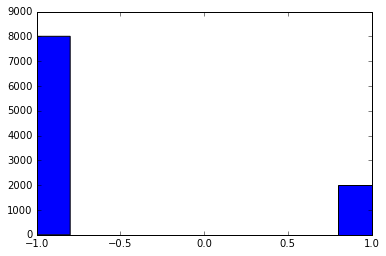

In [8]:
plt.hist(real(data))